<h1><b>Statistique en Bioinformatique : </b> TME4 </h1>
<br>
L’objectif de ce TME sont:
<br>
<ul>
<li> objectif 1 : Utiliser les chaines de Markov pour comprendre les états phénotypiques de cellules cancéreuses.   </li>
<li> objectif 2 : étudier la dynamique des proportions phénotypiques dans les lignées cellulaires du cancer du sein humain: SUM159 et SUM149</li>
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renomer le fichier TME3.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre sur moodle </li>
</div>


Nom etudiant 1 : Garcia Enzo
<br>
Nom etudiant 2 : Tantouch Maher
<br>

<h3>Introduction</h3>
<ul>
<li> Les cellules cancéreuses au sein des tumeurs existent souvent dans des états phénotypiques distincts.</li>
<li> Les sous-populations de cellules purifiées pour un état phénotypique reviennent vers des proportions d'équilibre dans le temps.</li>
<li> Cet équilibre peut s'expliquer par un modèle de Markov dans lequel les cellules passent de manière stochastique entre les états.  </li>
</ul>

<img src="img/CellStateTransition.png" />

<b>Exercice 1</b>:
Traduire les graphes de transition de la figure D en matrices de transition,
$P_{149}$ et $P_{159}$. Verifier bien que les matrices et les vecteur  $\pi_{0}$ soitent normalisés.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.legend_handler import HandlerLine2D
import random
import math as mt

#distribuition inicialle vecteur pi_0 S, L, B
pi0_149 = np.array([0.039, 0.033, 0.9280])
pi0_159 = np.array([0.019, 0.973, 0.0062])



#matrices
p_149 = np.array([[0.61, 0.30, 0.09], [0.01, 0.99, 0.00], [0.01, 0.08, 0.90]])


p_159 = np.array([[0.58, 0.07, 0.35], [0.04, 0.47, 0.49], [0.01, 0.00, 0.99]])

#Normaliser les vecteurs π0.

def normalise(m):
    """
    Normalise une matrice de transition pour que chaque ligne somme à 1.
    input1 m: matrice de transition
    output1 mN: matrice normalisée
    """
    return m / m.sum(axis=1, keepdims=True)


print (normalise(p_149))
#[[0.61       0.3        0.09      ]
# [0.01       0.99       0.        ]
# [0.01010101 0.08080808 0.90909091]]


print (normalise(p_159))
#[[0.58 0.07 0.35]
# [0.04 0.47 0.49]
# [0.01 0.00 0.99]]

[[0.61       0.3        0.09      ]
 [0.01       0.99       0.        ]
 [0.01010101 0.08080808 0.90909091]]
[[0.58 0.07 0.35]
 [0.04 0.47 0.49]
 [0.01 0.   0.99]]


<b>Exercice 2</b>: Déterminer les états stationnaires
$\pi^\star_{149}$ et $\pi^\star_{159}$.
Est-ce que les valeurs que vous trouvez sont consistentes avec les
valeurs experimentales en Fig. 1?

In [12]:
#You can use the function numpy.linalg.eig
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

mat = np.array([[1, 2], [20, 60]])
eigenvalues, eigenvectors = np.linalg.eig(mat)

print (eigenvalues,"\n" ,eigenvectors)

def etat_stationnaire(P):
    """
    Trouve l'état stationnaire d'une matrice de transition P.
    L'état stationnaire correspond au vecteur propre associé à la valeur propre 1.
    """
    eigenvalues, eigenvectors = np.linalg.eig(P.T)  ##on transpose pour chercher le bon vecteur propre
    idx = np.argmin(np.abs(eigenvalues - 1))  ##pour determiner indice de valeur propre 1
    pi_stat = np.real(eigenvectors[:, idx])  ##extraire le vecteur propre réel correspondant
    pi_stat /= np.sum(pi_stat)  ##normalisation pour que la somme des probabilités soit 1
    return pi_stat

#calcul des états stationnaires
pi_stat_149 = etat_stationnaire(p_149)
pi_stat_159 = etat_stationnaire(p_159)


print ("Pi star 149 " , pi_stat_149)
print ("Pi star 159 " , pi_stat_159)

#Pi star 149  [0.02500625 0.95023756 0.02475619]
#Pi star 159  [0.0234721  0.00310009 0.97342781]


[ 0.32965032 60.67034968] 
 [[-0.94815818 -0.03349867]
 [ 0.31779877 -0.99943876]]
Pi star 149  [0.02501411 0.95242228 0.02256361]
Pi star 159  [0.0234721  0.00310009 0.97342781]


<b>Exercice 3</b>: Déterminer les matrices de transition $P_{149}^n$ et $P_{159}^n$ pour $n$
iterations avec $n=2,4,8,16,32,64$, imprimer toutes les matrices. Computer les vectors $\pi^{(n)}$ et les comparer avec
$\pi^\star_{149,159}$. Utilisez le $\pi^0$ du papier de Gupta, page 2, ci-dessous.

In [18]:
pi_zero_149 = np.array([[0.039, 0.928, 0.033]])
pi_zero_159 = np.array([[0.019, 0.0062, 0.973]])


#matrice P**n
def matTransN(P, n):
    """
    Compute the transition matrix after N iterations
    input1 P: matrix
    input2 n: number of iterations
    output: Pn: transition matrix after N iterations
    """
    return np.linalg.matrix_power(P, n)

# Fonction pour imprimer les matrices P^n et les vecteurs pi_n
def printMatPi(P, pi_0, M_name):
    """
    Print all P**n matrices and pi_n, where n in {2,4,8,16,32,64}
    input1 P: matrix
    input2 pi_0: initial condition
    input3 M_name: matrix identifier
    output: None
    """
    for i in [2, 4, 8, 16, 32, 64]:
        P_n = matTransN(P, i)  ##on calcul P^n
        pi_n = np.dot(pi_0, P_n)  ##on calcul pi_n
        print(f"Matrice {M_name}^{i} :\n", P_n)
        print(f"Vecteur pi_{i} :\n", pi_n)
        print("\n")

printMatPi(p_149, pi_zero_149, '149')
printMatPi(p_159, pi_zero_159, '159')


Matrice 149^2 :
 [[3.760e-01 4.872e-01 1.359e-01]
 [1.600e-02 9.831e-01 9.000e-04]
 [1.590e-02 1.542e-01 8.109e-01]]
Vecteur pi_2 :
 [[0.0300367 0.9364062 0.032895 ]]


Matrice 149^4 :
 [[0.15133201 0.6831093  0.16173819]
 [0.02175991 0.97441959 0.003789  ]
 [0.02133891 0.28438128 0.6598584 ]]
Vecteur pi_4 :
 [[0.02679933 0.94028722 0.03159931]]


Matrice 149^8 :
 [[0.04121709 0.8150067  0.13378877]
 [0.02457711 0.96543545 0.00971169]
 [0.02349803 0.47933487 0.43994195]]
Vecteur pi_8 :
 [[0.02519046 0.94352741 0.02874829]]


Matrice 149^16 :
 [[0.02487313 0.88455819 0.07228877]
 [0.02496881 0.95675127 0.01693673]
 [0.02308695 0.69279745 0.20134784]]
Vecteur pi_16 :
 [[0.02490298 0.94522527 0.02518102]]


Matrice 149^32 :
 [[0.02437397 0.91838538 0.03133476]
 [0.02490101 0.94919309 0.02141937]
 [0.02252108 0.82274987 0.0539436 ]]
Vecteur pi_32 :
 [[0.02480192 0.94381896 0.02287937]]


Matrice 149^64 :
 [[0.02416851 0.91989042 0.0221253 ]
 [0.02472519 0.94145904 0.02226683]
 [0.0222511  

<b> Exercice 4 </b>:
 Ecrire une fonction pour déterminer les
$(\pi^{(t)})_{t=1:n}$ d'une chaine de Markov à trois états. Appliquer
pour $P_{149}$ et $P_{159}$, pour les conditions initiales
$\pi^{(0)}\in\{ (0.998,0.001,0.001), (0.001,0.998,0.001),
(0.001,0.001,0.998) \}$ et pour $n=20$ itérations de la chaine
de Markov. Visualiser graphiquement les résultats.


In [20]:

def Pi_n(pi_0, P, n):
    """
    Compute Pi_n = Pi_0 * P^n
    input1 pi_0: initial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output Pi_n: state distribution after n iterations
    """
    Pi_n = np.dot(pi_0, np.linalg.matrix_power(P, n))  # Pi_0 * P^n
    return Pi_n

In [22]:
def List_Pi_n(pi_0, P, n):
    """
    Compute a list of Pi_n from t=1 to n.
    input1 pi_0: initial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output liste_Pi_n: list of Pi_n
    """
    liste_Pi_n = []
    for t in range(1, n+1):
        Pi_n_t = Pi_n(pi_0, P, t)
        liste_Pi_n.append(Pi_n_t)
    return np.array(liste_Pi_n)


In [24]:
def plot(liste_Pi_n):
    """
    Plot liste_Pi_n for each state.
    """
    plt.figure(figsize=(10, 6))
    for i in range(liste_Pi_n.shape[1]):
        plt.plot(liste_Pi_n[:, i], label=f"State {i+1}")
    
    plt.title("Evolution of Pi_n over iterations")
    plt.xlabel("Iterations (n)")
    plt.ylabel("Proportions of States")
    plt.legend()
    plt.show()


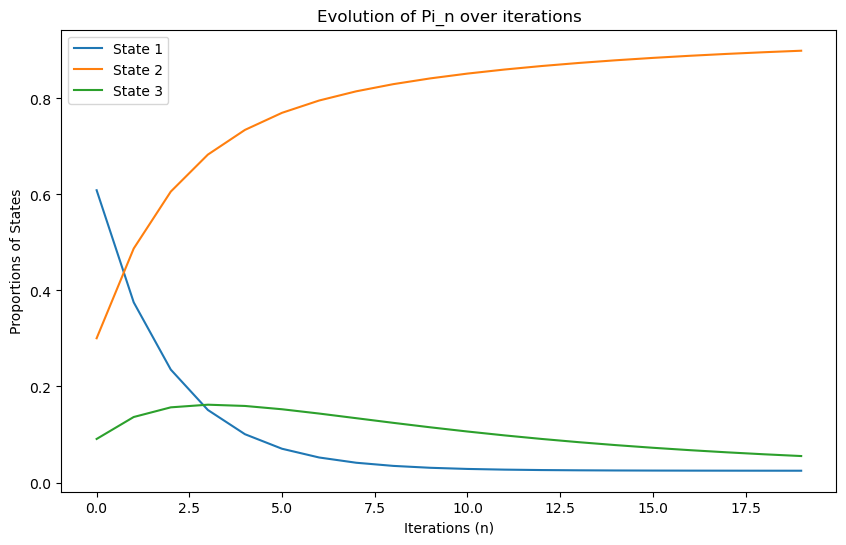

In [26]:
pi1 = np.array([0.998,0.001,0.001])
plot(List_Pi_n(pi1, p_149, 20))

<b> Exercice 5 </b>:
Ecrire une fonction pour simuler la trajectoire stochastique
$(x_t)_{t=0:n}$ d'une seule réalisation de la chaiine de Markov.
Créer des population de $N=10,100,1000,10000$ trajectoires. Estimer
la trajectoire moyenne de chaque population.


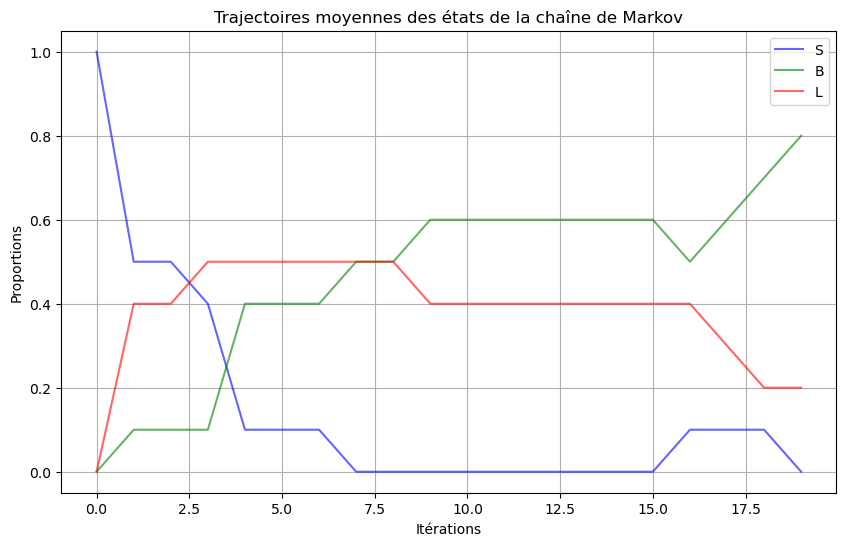

In [38]:


# Définir la fonction Trajectoire
def Trajectoire(n, Pi_0, P):
    """
    Simuler la trajectoire stochastique d'une seule réalisation
    input1 n: nombre d'itérations
    input2 Pi_0: condition initiale (vecteur de probabilité)
    input3 P: matrice de transition
    output Traj: liste des états simulant la trajectoire stochastique ['S', 'B', 'L']
    """
    states = ['S', 'B', 'L']
    
    #on verifie que P est bien normalisee
    if not np.allclose(np.sum(P, axis=1), 1):
        P = P / np.sum(P, axis=1, keepdims=True)

    #on initialise avec un etat tiré selon Pi_0
    Traj = [np.random.choice(states, p=Pi_0)]  
    
    for i in range(1, n):
        current_state = states.index(Traj[-1])  
        next_state = np.random.choice(states, p=P[current_state])  
        Traj.append(next_state)
    
    return Traj

#on determiner trajectoire pour N populations
def Trajectoire_P(n, Pi_0, P, N):
    return [Trajectoire(n, Pi_0, P) for _ in range(N)]

#on estime la trajectoire moyenne d'une chaîne de Markov pour N populations
def Trajectoire_moy(n, Pi_0, P, N):
    TrajP = Trajectoire_P(n, Pi_0, P, N)
    states = ['S', 'B', 'L']
    TrajMoy = np.zeros((3, n))  

    for i in range(n):
        state_counts = [0, 0, 0]  
        for traj in TrajP:
            state_counts[states.index(traj[i])] += 1
        TrajMoy[:, i] = np.array(state_counts) / N
    
    return TrajMoy

#visulation graphiquement des trajectoires
def plotTrajectory(TrajMoy):
    plt.figure(figsize=(10, 6))
    plt.plot(TrajMoy[0], label='S', color='blue', alpha=0.6)
    plt.plot(TrajMoy[1], label='B', color='green', alpha=0.6)
    plt.plot(TrajMoy[2], label='L', color='red', alpha=0.6)
    plt.xlabel('Itérations')
    plt.ylabel('Proportions')
    plt.title('Trajectoires moyennes des états de la chaîne de Markov')
    plt.legend()
    plt.grid(True)
    plt.show()
    
#exemple
pi1 = np.array([0.998, 0.001, 0.001])
TrajMoy = Trajectoire_moy(20, pi1, p_149, 10)
plotTrajectory(TrajMoy)


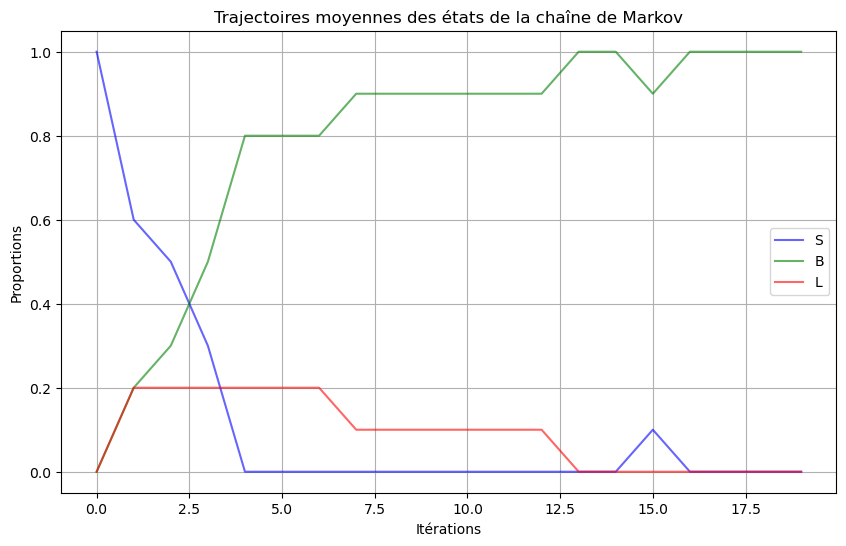

In [40]:
plotTrajectory(Trajectoire_moy(20, pi1, p_149, 10))

<b> Exercice 6 </b>:
Ecrire une fonction pour calculer la probabilité d'une trajectoire
$(x_t)_{t=0:n}$. Pour y facilite vous devez applique le log et utlise la some au
lieu du product.  Ensuite vouz devez comparer les probabilités de
deux chaiines de Markov $P_{149}$ et $P_{159}$. Visualiser les histogrammes pour les deux populations de taille $N=10000$ (géenérées avec $P_{149}$ et $P_{159}$). Est-ce que vous observez des différences entre les deux modèles? Comment est-ce que vous expliquer cettes différences?

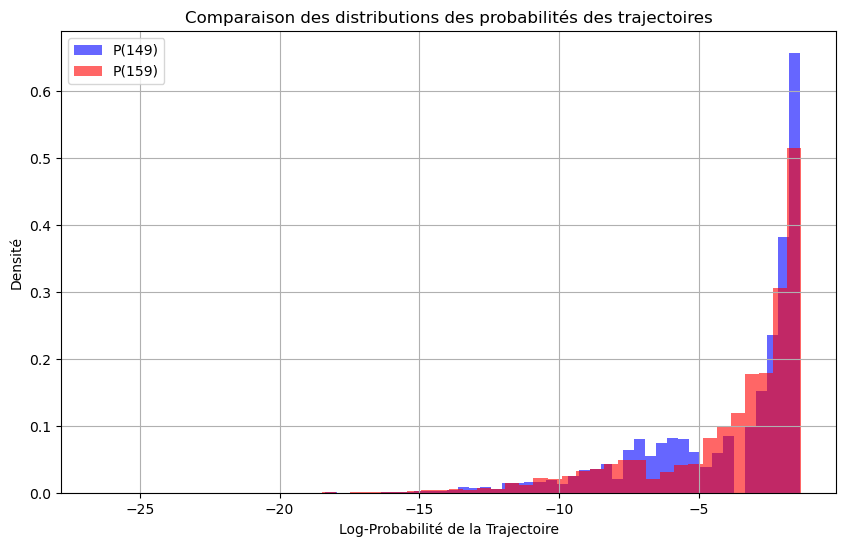

In [46]:
#Calculer la probabilité d’une trajectoire (xt)t=0:n
#fonction pour calculer la proba d’une trajectoire
def Pb_Trajectoire(Traj, Pi_0, P):
    """
    Calcule la probabilité d'une trajectoire donnée en log.
    
    Parameters:
        Traj (list): Une trajectoire sous forme de liste d'états.
        Pi_0 (np.array): Vecteur de probabilité initial.
        P (np.array): Matrice de transition.
    
    Returns:
        float: Log-probabilité de la trajectoire.
    """
    states = ['S', 'B', 'L']
    
    if Traj[0] not in states:
        raise ValueError(f"État initial inconnu : {Traj[0]}")
    
    proba_log = np.log(Pi_0[states.index(Traj[0])])

    for i in range(len(Traj) - 1):
        if Traj[i+1] not in states:
            raise ValueError(f"État inconnu dans la trajectoire : {Traj[i+1]}")
        
        s1 = states.index(Traj[i])
        s2 = states.index(Traj[i + 1])

        if P[s1, s2] <= 0:
            raise ValueError(f"Transition impossible de {Traj[i]} à {Traj[i+1]}")
        
        proba_log += np.log(P[s1, s2])
    
    return proba_log


#fonction pour générer l’histogramme des log-probabilités des trajectoires
def Histo(Trajs, Pi_0, P):
    """
    Calcule une liste de log-probabilités pour une population de trajectoires.
    
    Parameters:
        Trajs (list of list): Liste de trajectoires.
        Pi_0 (np.array): Condition initiale.
        P (np.array): Matrice de transition.
    
    Returns:
        list: Liste des log-probabilités des trajectoires.
    """
    return [Pb_Trajectoire(traj, Pi_0, P) for traj in Trajs]


def plotHist(Histo149, Histo159):
    """
    Trace deux histogrammes des log-probabilités des trajectoires.
    
    Parameters:
        Histo149 (list): Log-probabilités pour P149.
        Histo159 (list): Log-probabilités pour P159.
    """
    plt.figure(figsize=(10, 6))
    
    plt.hist(Histo149, bins=50, alpha=0.6, color='blue', label="P(149)", density=True)
    plt.hist(Histo159, bins=50, alpha=0.6, color='red', label="P(159)", density=True)
    
    plt.xlabel("Log-Probabilité de la Trajectoire")
    plt.ylabel("Densité")
    plt.title("Comparaison des distributions des probabilités des trajectoires")
    plt.legend()
    plt.grid(True)
    plt.show()


#-------------------------------------------------------------
plotHist(Histo(Trajectoire_P(20, pi0_149, p_149, 10000),pi0_149, p_149), Histo(Trajectoire_P(20, pi0_159, p_159, 10000),pi0_159, p_159))
